dual solution: [ 0.          9.99999998 10.00000006]
Dual optimal value: -280.00000014103995
Optimal profit at t = 0: -279.99999997307026


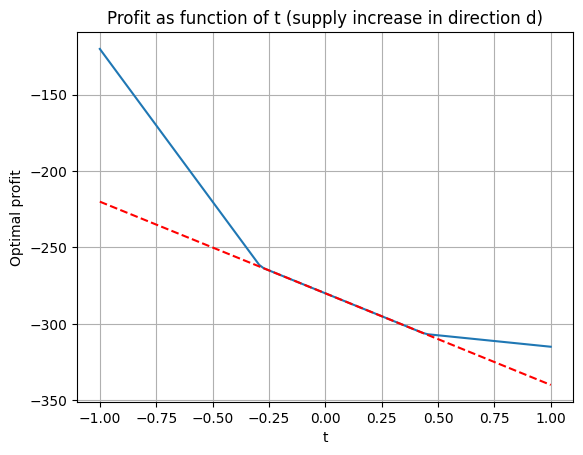

[np.float64(-120.00000001612197), np.float64(-124.0404040549837), np.float64(-128.0808080938425), np.float64(-132.1212121327082), np.float64(-136.16161617158883), np.float64(-140.20202021049113), np.float64(-144.24242424942085), np.float64(-148.28282828838334), np.float64(-152.32323232738383), np.float64(-156.3636363664434), np.float64(-160.404040405538), np.float64(-164.44444444465563), np.float64(-168.48484848381167), np.float64(-172.52525252311145), np.float64(-176.56565656290755), np.float64(-180.60606060320046), np.float64(-184.64646464407446), np.float64(-188.68686868599463), np.float64(-192.72727273057018), np.float64(-196.7676767802026), np.float64(-200.80808082948738), np.float64(-204.84848487967847), np.float64(-208.88888892953926), np.float64(-212.92929297770036), np.float64(-216.9696970231438), np.float64(-221.01010106525018), np.float64(-225.05050510375278), np.float64(-229.09090914043418), np.float64(-233.13131316984703), np.float64(-237.17171719026393), np.float64(-241.2

In [23]:
import cvxpy as cp
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt


x = cp.Variable(3, nonneg = True)
t = cp.Parameter()
# Define dual objective function (maximize)
objective = cp.Minimize(-60 * x[0] - 30 * x[1] - 20 * x[2])

# Define dual constraints
constraints = [
    8 * x[0] + 6 * x[1] + 1 * x[2]  <= 48 + t,
    4 * x[0] + 2 * x[1] + 1.5 * x[2] <= 20 + t,
    2 * x[0] + 1.5 * x[1] + .5 * x[2] <= 8 + 5 * t
]
d = np.array([1, 1, 5])

prob = cp.Problem(objective, constraints)

t_values = np.linspace(-1, 1, 100)
x_vector = []
objective_vector = []
for t_val in t_values:
  t.value = t_val
  prob.solve()
  x_vector.append(x.value)
  objective_vector.append(prob.objective.value)


# Dual variables
y = cp.Variable(3, nonneg=True)


# Objective (note the dependency on t)
dual_obj = cp.Maximize(-(48) * y[0] - (20 ) * y[1] - (8 ) * y[2])

# Dual constraints (transposed resource matrix * y ≥ profit vector)
dual_constraints = [
    8 * y[0] + 4 * y[1] + 2 * y[2] >= 60,   # chocolate A
    6 * y[0] + 2 * y[1] + 1.5 * y[2] >= 30, # chocolate B
    1 * y[0] + 1.5 * y[1] + 0.5 * y[2] >= 20  # chocolate C
]

# Problem setup
dual_problem = cp.Problem(dual_obj, dual_constraints)
dual_problem.solve()
ysol = y.value
print("dual solution:", ysol)


print("Dual optimal value:", dual_problem.value)
t.value = 0
prob.solve()
p_star_0 = prob.value  # or: p_star_0 = objective.value
print("Optimal profit at t = 0:", p_star_0)

plt.plot(t_values, objective_vector)
plt.plot(t_values, p_star_0 - (t_values * (d @ ysol)), linestyle='--', color='red')
plt.xlabel("t")
plt.ylabel("Optimal profit")
plt.title("Profit as function of t (supply increase in direction d)")
plt.grid(True)
plt.show()
print(objective_vector)

In [22]:
x = cp.Variable(12, nonneg = True)

#Maybe just write out the different A, b and c instead of just doing th equations 

A = np.array([
    [1, 1, -1, 0, 0,0,0,0,0,0,0,0],        
    [0, 0, 1, -1, 0,0,-1,0,0,0,0,0],      # sugar
    [-1, 0, 0, 1, 1,0,0,0,0,0,0,0],     
    [0, 0, 0, 0, -1,1,0,-1,0,0,0,0],
    [0, 0, 0, 0, 0,-1,1,0,0,0,-1,0],
    [0, 0, 0, 0, 0,0,0,1,1,-1,0,0],
    [0, -1, 0, 0, 0,0,0,0,0,1,0,-1],
    [0, 0, 0, 0, 0,0,0,0,-1,0,1,1]
])

# Original resource amounts
b = np.array([2, -2, -1, 2, -6, 0, 0, 5])

# Profit vector
c = np.array([0, 1, 0, 3,2 ,2 ,1 ,3, 0, 1, 4, 1])


objective = cp.Minimize(c @ x)

# Define dual constraints
constraints = [
   A @ x == b
]
networkprob = cp.Problem(objective, constraints)
networkprob.solve()
x_sol = x.value
print("solution vector of flows:", x_sol)
print("objective value:", networkprob.value)





solution vector of flows: [2.00000000e+00 0.00000000e+00 0.00000000e+00 9.99999999e-01
 0.00000000e+00 2.00000000e+00 1.00000000e+00 0.00000000e+00
 1.30363798e-09 1.05842883e-09 5.00000000e+00 1.08189495e-09]
objective value: 27.999999998550603
